In [ ]:
import pandas as pd
from scipy.stats import rankdata
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
male_df = pd.read_csv('/content/male_population_manhattan.csv')
female_df = pd.read_csv('/content/female_population_manhattan.csv')
all_df = pd.read_csv('/content/manhattan_all_population_age_groups.csv')

In [ ]:
# Remove the total population row and ensure all data are numerical.
male_df = male_df.drop(index=0).reset_index(drop=True)
male_df.head()

,label_(grouping),location_103,location_232,location_148,location_4,location_231,location_79,location_125,location_144,location_234,...,location_194,location_13,location_120,location_202,location_209,location_12,location_158,location_128,location_261,manhattan
0,Under 5 years,1,923,376,465,916,376,81,178,460,...,3,687,1,318,118,0,257,0,72,34835
1,5 to 9 years,0,1088,299,565,811,298,53,146,292,...,1,581,0,273,116,1,213,0,90,31926
2,10 to 14 years,0,1172,328,539,637,288,51,154,220,...,1,444,0,201,113,0,166,0,79,31978
3,15 to 19 years,0,1139,415,617,483,1512,29,162,225,...,8,242,1,169,231,0,147,1,67,34938
4,20 to 24 years,0,1514,1120,1108,829,3425,60,552,601,...,14,254,0,426,296,0,274,0,235,58660


In [ ]:
female_df = female_df.drop(index=0).reset_index(drop=True)
female_df.head()

,label_(grouping),location_103,location_232,location_148,location_4,location_231,location_79,location_125,location_144,location_234,...,location_194,location_13,location_120,location_202,location_209,location_12,location_158,location_128,location_261,manhattan
0,Under 5 years,0,903,317,460,899,400,71,148,381,...,3,668,1,326,129,0,218,0,132,33820
1,5 to 9 years,0,951,342,477,715,268,60,119,279,...,2,527,0,241,131,0,166,0,90,30959
2,10 to 14 years,0,1080,302,578,582,303,51,160,235,...,5,417,0,213,94,0,153,3,80,31316
3,15 to 19 years,0,1129,353,636,588,1838,35,226,393,...,8,223,0,199,399,0,170,0,66,39754
4,20 to 24 years,1,1612,1496,1447,1121,4516,92,808,834,...,2,300,0,541,563,0,363,0,447,78486


In [ ]:
all_df.head()

,label_(grouping),location_103,location_232,location_148,location_4,location_231,location_79,location_125,location_144,location_234,...,location_194,location_13,location_120,location_202,location_209,location_12,location_158,location_128,location_261,manhattan
0,Under 5 years,1,1825,693,925,1815,776,152,326,841,...,6,1355,2,644,247,0,476,0,204,68655
1,5 to 9 years,0,2039,641,1041,1526,566,113,265,571,...,3,1109,0,514,247,1,380,0,180,62885
2,10 to 14 years,0,2252,630,1117,1219,591,102,314,455,...,6,861,0,414,208,0,320,3,159,63296
3,15 to 19 years,0,2269,768,1253,1071,3350,64,388,618,...,16,465,1,368,630,0,317,1,133,74692
4,20 to 24 years,1,3125,2616,2555,1950,7941,152,1360,1435,...,16,554,0,967,859,0,638,0,681,137144


In [ ]:
male_df.dtypes

label_(grouping)    object
location_103         int64
location_232         int64
location_148         int64
location_4           int64
                     ...  
location_12          int64
location_158         int64
location_128         int64
location_261         int64
manhattan            int64
Length: 69, dtype: object

In [ ]:
# Function to plot the distribution of a certain age group across locations
def plot_age_group_distribution(df, age_group):

    # Filter the dataframe for the specified age group
    age_group_data = df[df['label_(grouping)'] == age_group]

    # Drop unnecessary columns
    age_group_data = age_group_data.drop(columns=['label_(grouping)', 'manhattan'])

    # Plot the distribution
    plt.figure(figsize=(15, 6))
    sns.barplot(x=age_group_data.columns, y=age_group_data.iloc[0])
    plt.title(f'Distribution of {age_group} Across Locations')
    plt.xlabel('Locations')
    plt.ylabel('Population')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()


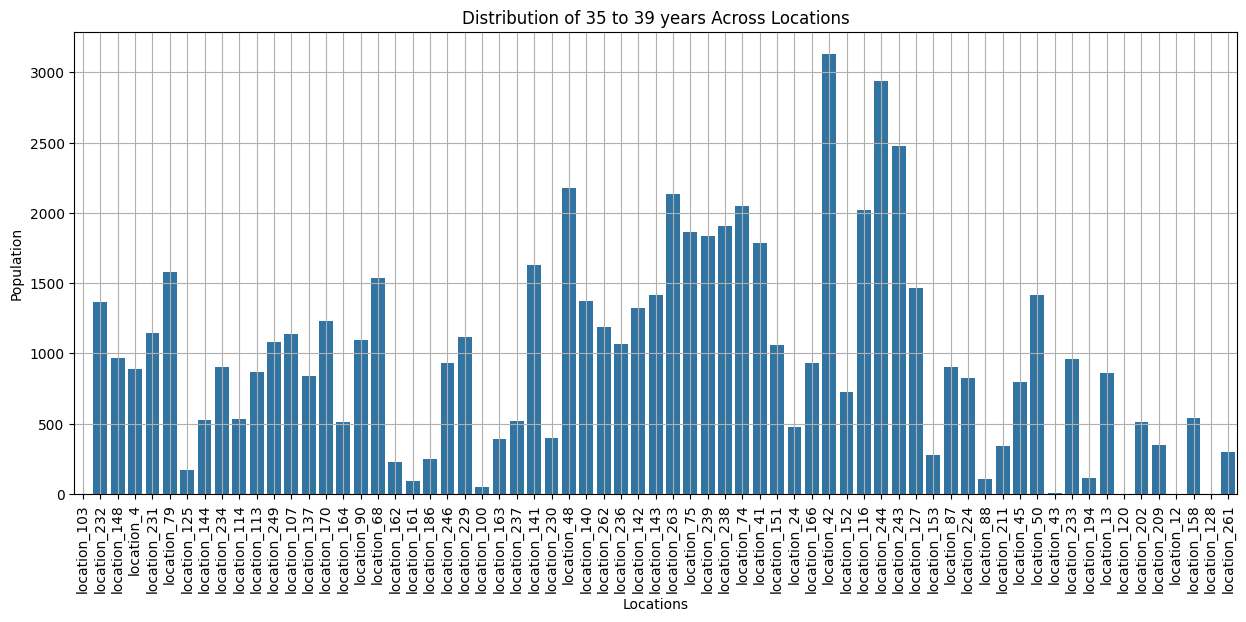

In [ ]:
plot_age_group_distribution(male_df, age_group='35 to 39 years')


In [ ]:
# function to normalize the population data for an age group and assign scores
def assign_min_max_scores(age_group_data):
    min_pop = age_group_data.min()
    max_pop = age_group_data.max()
    scores = 100 * (age_group_data - min_pop) / (max_pop - min_pop)
    return scores

#function to calculate percentile ranks
def calculate_percentile_ranks(data):
    return rankdata(data, method='average') / len(data) * 100

In [ ]:
def calc_all_ranks(df):
    # change the format of the final dataframe
    locations_data_cleaned = df.drop(columns=['label_(grouping)', 'manhattan']).astype(int)

    final_df = pd.DataFrame(columns=['age_group', 'zone_id', 'score', 'rank'])

    # Calculate scores and percentiles for each age group
    rows = []
    for index, row in df.iterrows():
        age_group_label = row['label_(grouping)']
        age_group_data = row[1:-1].astype(int)  # exclude 'manhattan' column

        scores = assign_min_max_scores(age_group_data)
        ranks = calculate_percentile_ranks(age_group_data)

        for location, score, rank in zip(locations_data_cleaned.columns, scores, ranks):
            rows.append({'age_group': age_group_label, 'zone_id': location, 'score': score, 'rank': rank})

    # Convert rows to dataframe
    final_df = pd.DataFrame(rows, columns=['age_group', 'zone_id', 'score', 'rank'])
    return final_df

In [ ]:
female_ranks = calc_all_ranks(female_df)
female_ranks['gender'] = 'Female'
female_ranks = female_ranks[['gender', 'age_group', 'zone_id', 'score', 'rank']]
female_ranks.head()

,gender,age_group,zone_id,score,rank
0,Female,Under 5 years,location_103,0.000000,2.985075
1,Female,Under 5 years,location_232,42.938659,82.089552
2,Female,Under 5 years,location_148,15.073704,40.298507
3,Female,Under 5 years,location_4,21.873514,60.447761
4,Female,Under 5 years,location_231,42.748455,80.597015


In [ ]:
male_ranks = calc_all_ranks(male_df)
male_ranks['gender'] = 'Male'
male_ranks = male_ranks[['gender', 'age_group', 'zone_id', 'score', 'rank']]
male_ranks.head()

,gender,age_group,zone_id,score,rank
0,Male,Under 5 years,location_103,0.046795,5.223881
1,Male,Under 5 years,location_232,43.191390,82.089552
2,Male,Under 5 years,location_148,17.594759,48.507463
3,Male,Under 5 years,location_4,21.759476,61.194030
4,Male,Under 5 years,location_231,42.863828,80.597015


In [ ]:
all_ranks = calc_all_ranks(all_df)
all_ranks['gender'] = 'Male and Female'
all_ranks = all_ranks[['gender', 'age_group', 'zone_id', 'score', 'rank']]
all_ranks.head()

,gender,age_group,zone_id,score,rank
0,Male and Female,Under 5 years,location_103,0.023585,4.477612
1,Male and Female,Under 5 years,location_232,43.042453,82.089552
2,Male and Female,Under 5 years,location_148,16.344340,44.776119
3,Male and Female,Under 5 years,location_4,21.816038,61.940299
4,Male and Female,Under 5 years,location_231,42.806604,80.597015


In [ ]:
#combine male_ranks, female_ranks and all_ranks into a single final_ranks df
final_ranks = pd.concat([male_ranks, female_ranks, all_ranks], ignore_index=True)
final_ranks.head()

,gender,age_group,zone_id,score,rank
0,Male,Under 5 years,location_103,0.046795,5.223881
1,Male,Under 5 years,location_232,43.191390,82.089552
2,Male,Under 5 years,location_148,17.594759,48.507463
3,Male,Under 5 years,location_4,21.759476,61.194030
4,Male,Under 5 years,location_231,42.863828,80.597015


In [ ]:
#export to csv
final_ranks.to_csv('demographic_scores_and_ranks.csv', index=False)

In [ ]:
# Function to plot the distribution of score or rank across locations for a given age group
def plot_distribution(data, age_group, metric='score'):
    subset = data[data['age_group'] == age_group]

    plt.figure(figsize=(15, 6))
    sns.barplot(x=subset['zone_id'], y=subset[metric])
    plt.title(f'Distribution of {metric} for {age_group} Across Locations')
    plt.xlabel('zone_id')
    plt.ylabel(metric)
    plt.xticks(rotation=90)
    plt.ylim(0, 100)
    plt.grid(True)
    plt.show()

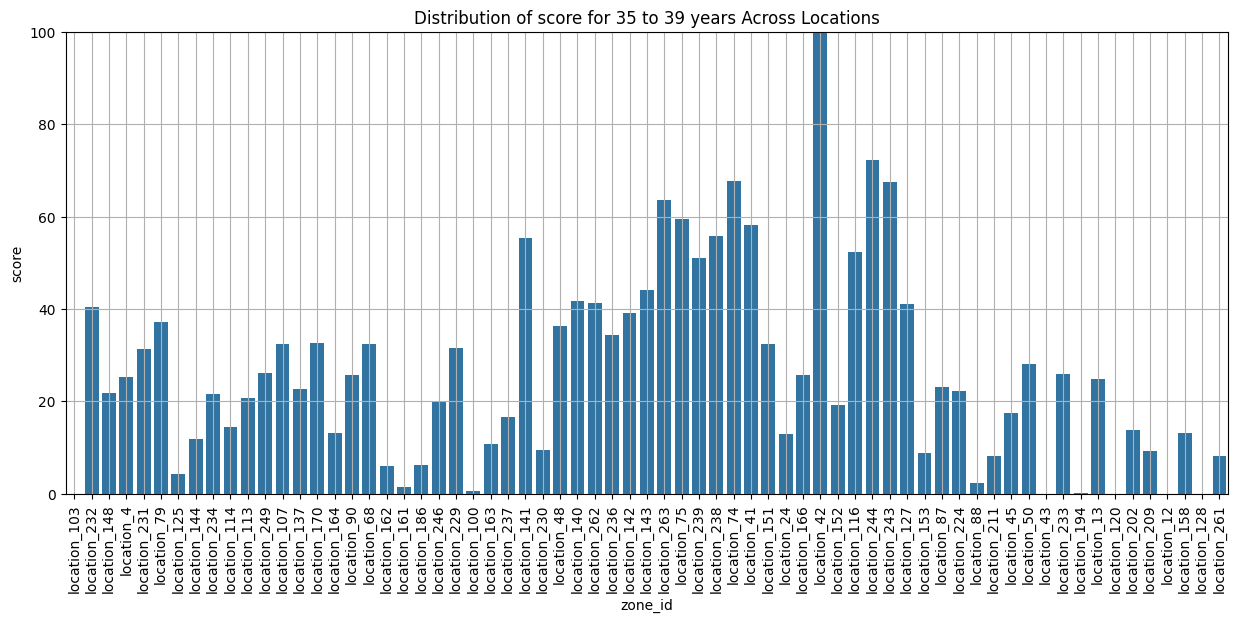

In [ ]:
plot_distribution(calc_all_ranks(female_df), age_group='35 to 39 years', metric='score')

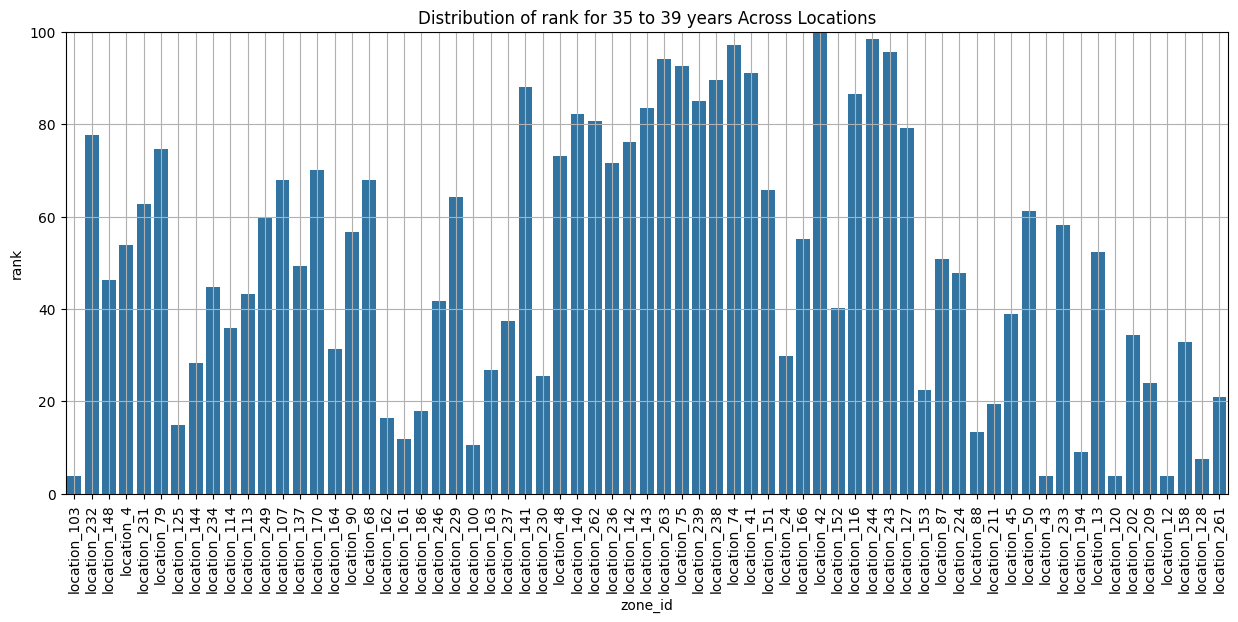

In [ ]:
plot_distribution(calc_all_ranks(female_df), age_group='35 to 39 years', metric='rank')

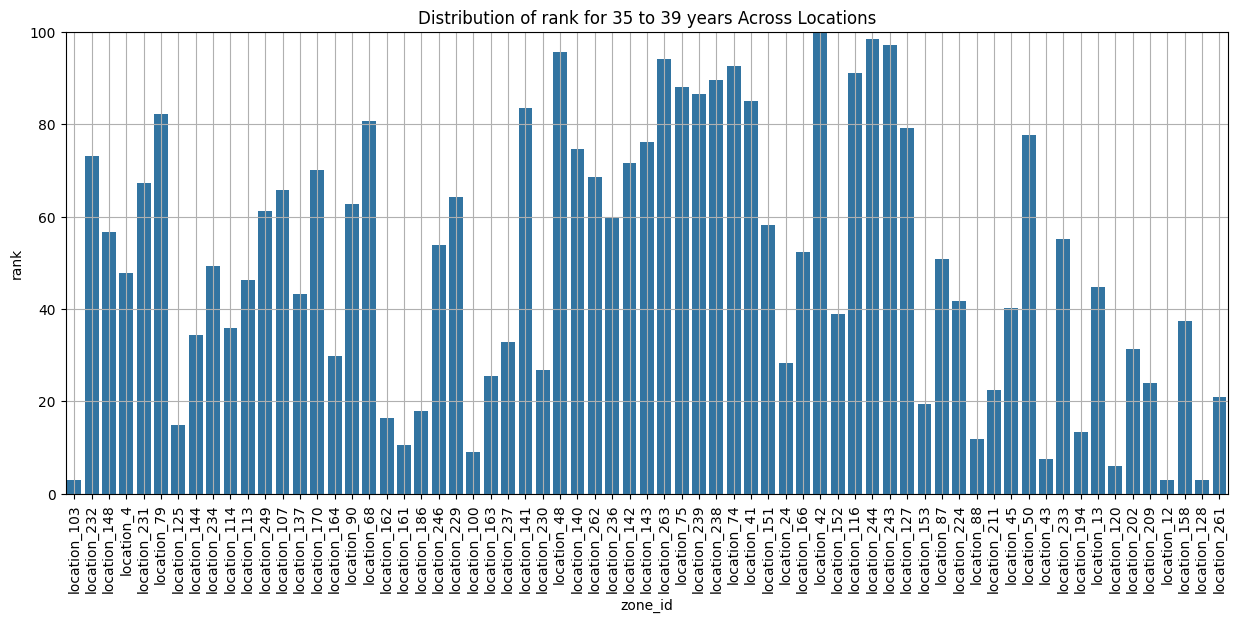

In [ ]:
plot_distribution(calc_all_ranks(male_df), age_group='35 to 39 years', metric='rank')

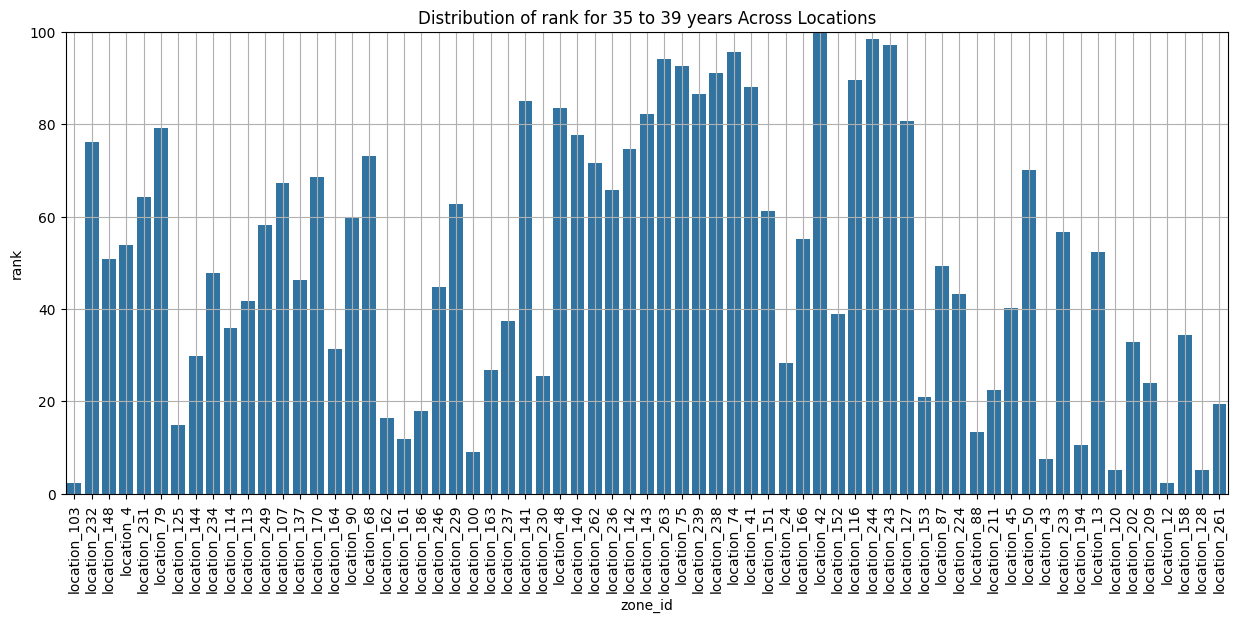

In [ ]:
plot_distribution(calc_all_ranks(all_df), age_group='35 to 39 years', metric='rank')